# Movie genre analysis project

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
# Data Cleaning and Preparation

In [9]:
# To prevent large number rows and allow a glance look at the data
pd.set_option('display.max.rows', 4)

In [11]:
# Importing the data
movies = pd.read_csv(r"C:\Users\Olujide\OneDrive\Desktop\Desktop 1\Python\Pandas\imdb_movies.csv")
movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,1.276423e+05,0.000000e+00


In [13]:
# Checking the data info for the total number of columns and rows. 
# This also allows me to identify the number of null values for data cleaning
# Already, the id is unique but columns like genre has some null entries
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [15]:
# Identifying duplicates

movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [17]:
# Dropping the found duplicate

movies.drop_duplicates(inplace = True)

In [21]:
# Creating the profit column
movies['profit'] = movies['revenue'] - movies['budget']

In [23]:
# Dropping null values on genre column

movies.dropna(subset = ['genres'], inplace = True)

In [25]:
# The data appears cleaner now with the null values removed especially for the part of the data needed for this analysis

movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10842 non-null  float64
 3   budget                10842 non-null  int64  
 4   revenue               10842 non-null  int64  
 5   original_title        10842 non-null  object 
 6   cast                  10767 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10800 non-null  object 
 9   tagline               8036 non-null   object 
 10  keywords              9367 non-null   object 
 11  overview              10839 non-null  object 
 12  runtime               10842 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9826 non-null   object 
 15  release_date          10

# Exploratory Data Analysis

In [27]:
# Selecting the columns needed

movies_genre = movies[['popularity', 'budget', 'revenue', 'profit', 'original_title', 'runtime' , 'release_year', 'genres', 'release_date', 'vote_count', 'vote_average']]

In [29]:
# Displaying the top 5 rows of the cleaned dataset that contains the columns needed

movies_genre.head()

,popularity,budget,revenue,profit,original_title,runtime,release_year,genres,release_date,vote_count,vote_average
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,2015,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,120,2015,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1
...,...,...,...,...,...,...,...,...,...,...,...
3,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,136,2015,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5
4,9.335014,190000000,1506249360,1316249360,Furious 7,137,2015,Action|Crime|Thriller,4/1/15,2947,7.3


In [31]:
# Splitting the genre column to allow each genre identification

split = movies_genre['genres'].str.split('|').explode()
split

0           Action
0        Adventure
           ...    
10864       Comedy
10865       Horror
Name: genres, Length: 26955, dtype: object

In [33]:
# Naming the series columns(split), deleting the original genre column and adding the genre_split to the table

split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)

In [35]:
movies_genre.head()

,popularity,budget,revenue,profit,original_title,runtime,release_year,release_date,vote_count,vote_average,genres_split
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,2015,6/9/15,5562,6.5,Action
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,2015,6/9/15,5562,6.5,Adventure
...,...,...,...,...,...,...,...,...,...,...,...
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,2015,6/9/15,5562,6.5,Thriller
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,120,2015,5/13/15,6185,7.1,Action


# EDA and Visualization

In [40]:
# The most common genre

common_genre = pd.DataFrame(movies_genre.groupby('genres_split')['original_title'].nunique()).sort_values(by = 'original_title')

In [44]:
common_genre.rename(columns = {'original_title' : 'genre_counts'}, inplace = True)

In [111]:
common_genre

,genre_counts
genres_split,
Western,163
TV Movie,167
Foreign,188
War,269
History,331
Music,403
Documentary,520
Animation,697
Mystery,796


In [51]:
# Visualizing the above result in a bar chart

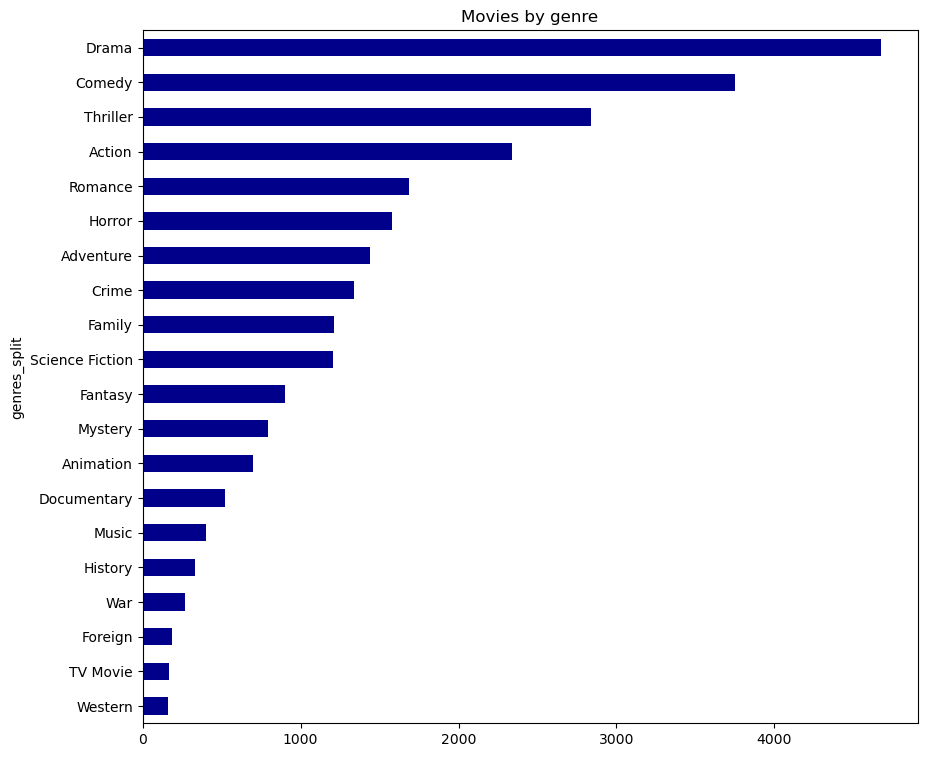

In [53]:
common_genre['genre_counts'].plot.barh(title = 'Movies by genre', color = 'DarkBlue', figsize = (10,9), )
plt.show()

In [55]:
pd.set_option('display.max.rows', 20)

In [60]:
# Exploring the budget and revenue generated by different genres

budget_revenue_genres = movies_genre.groupby('genres_split').agg(avg_budget = ('budget', 'mean'), avg_revenue = ('revenue', 'mean')).sort_values(by = 'avg_revenue', ascending = True)

In [117]:
budget_revenue_genres

,avg_budget,avg_revenue
genres_split,,
TV Movie,267664.67,251497.01
Foreign,1451434.93,1520459.84
Documentary,577149.15,2041106.99
Horror,6226529.21,16822808.62
Western,18974107.98,28568709.28
Music,9438627.55,28571768.69
Drama,11880717.77,29232255.73
History,18594919.30,32011793.22
Romance,12531271.85,35691972.33


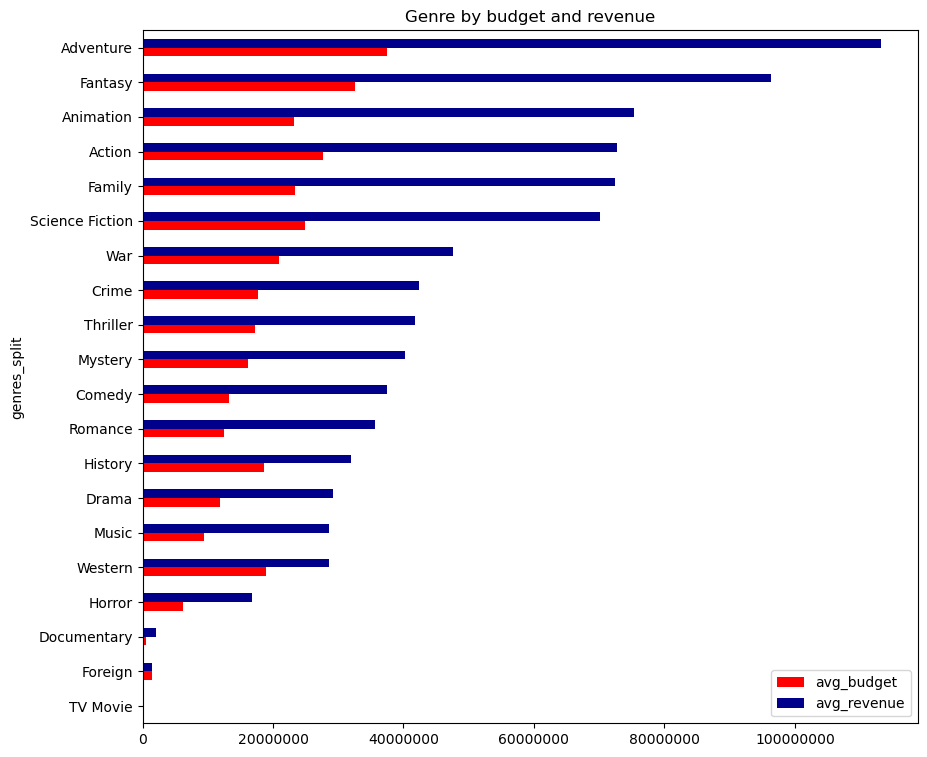

In [64]:
budget_revenue_genres[['avg_budget', 'avg_revenue']].plot.barh(title = 'Genre by budget and revenue', color = ('red', 'DarkBlue'), figsize = (10,9))
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.show()

In [66]:
# Getting the average of all the attributes for different genre
genre_avg = movies_genre.groupby('genres_split').mean(numeric_only = True)
pd.options.display.float_format = '{:.2f}'.format    # Formating to float`
genre_avg.sort_values(by = 'budget', ascending = True, inplace = True)
genre_avg

,popularity,budget,revenue,profit,runtime,release_year,vote_count,vote_average
genres_split,,,,,,,,
TV Movie,0.27,267664.67,251497.01,-16167.66,91.98,2004.63,34.37,5.79
Documentary,0.18,577149.15,2041106.99,1463957.85,102.65,2008.31,35.11,6.91
Foreign,0.19,1451434.93,1520459.84,69024.91,107.23,2001.40,16.63,5.98
Horror,0.47,6226529.21,16822808.62,10596279.41,94.42,2001.12,120.06,5.34
Music,0.49,9438627.55,28571768.69,19133141.14,105.14,2000.20,124.34,6.48
Drama,0.59,11880717.77,29232255.73,17351537.95,110.48,2000.93,182.54,6.17
Romance,0.59,12531271.85,35691972.33,23160700.48,106.89,2000.44,166.07,6.04
Comedy,0.59,13297915.62,37526242.07,24228326.45,96.75,2000.82,176.44,5.91
Mystery,0.69,16119270.06,40217566.66,24098296.60,105.93,1999.85,237.00,5.95


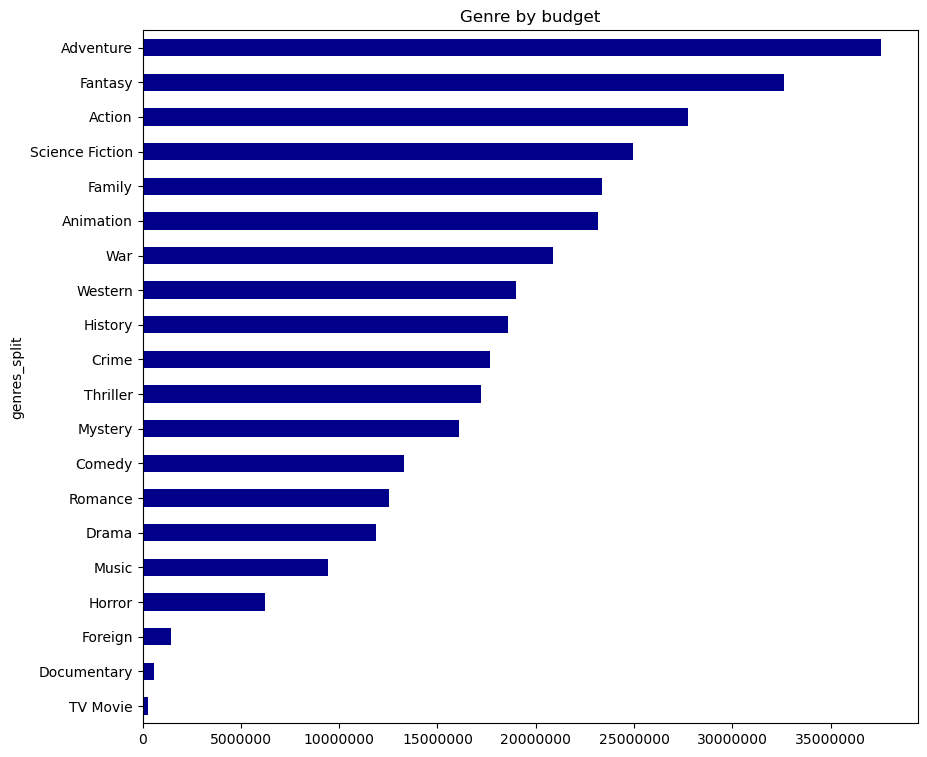

In [68]:
# Budget by Genre

genre_avg['budget'].plot.barh(title = 'Genre by budget', color = 'darkblue', figsize = (10,9))
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.show()


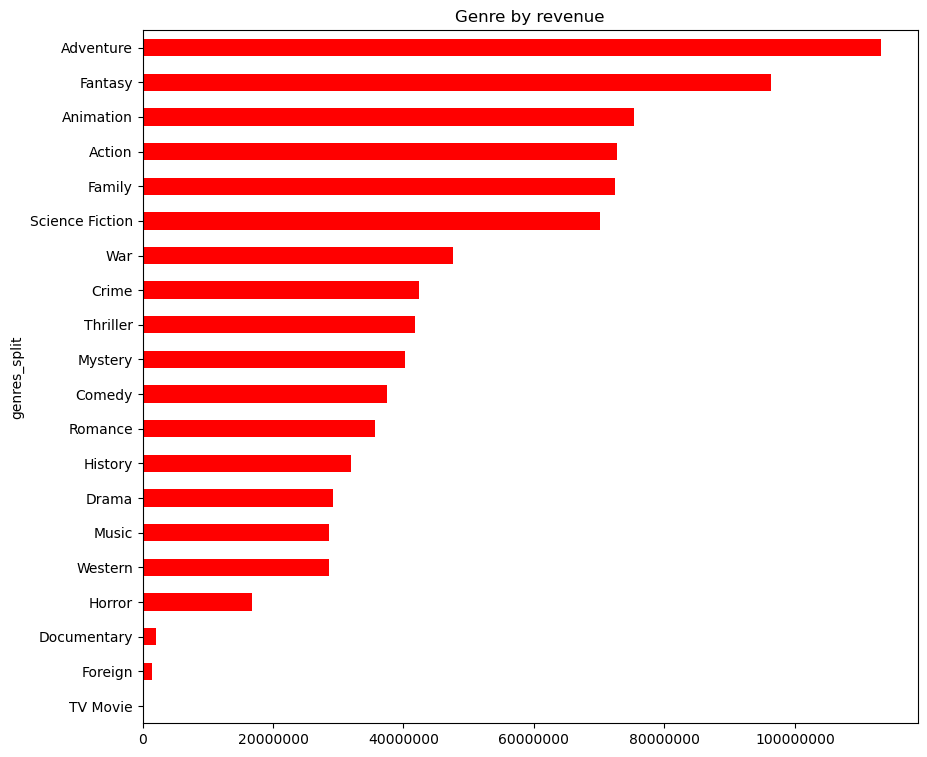

In [72]:
# Revenue by genre, sorting by revenue first before visualizing

genre_avg.sort_values(by = 'revenue', ascending = True, inplace = True)
plt.ticklabel_format(style = 'plain', axis = 'x')
genre_avg['revenue'].plot.barh(title = 'Genre by revenue', color = 'red', figsize = (10,9))
plt.show()

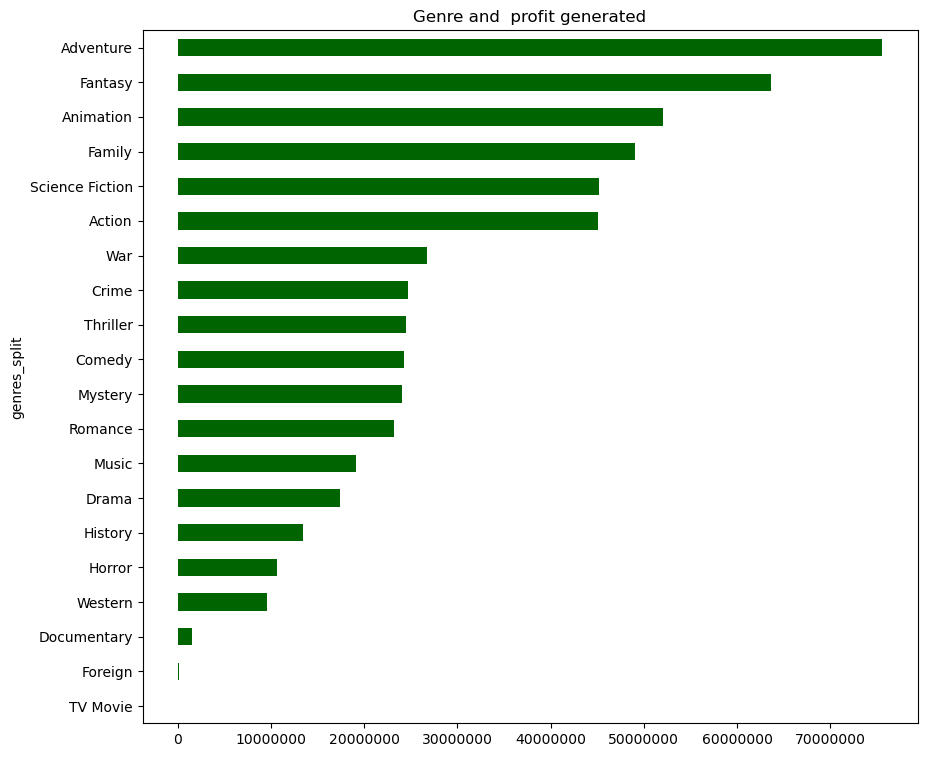

In [74]:
# Genre with highest average profit
genre_avg.sort_values(by = 'profit', ascending = True, inplace = True)
plt.ticklabel_format(style = 'plain', axis = 'x')
genre_avg['profit'].plot.barh(title = 'Genre and  profit generated', color = 'darkgreen', figsize = (10,9))
plt.show()

In [76]:
# High rating movies: Movies with vote_average >= 8 and vote_count > 50

high_rating_movies = movies_genre[(movies_genre['vote_average'] >= 8) & (movies_genre['vote_count'] > 50)]
high_rating_movies

,popularity,budget,revenue,profit,original_title,runtime,release_year,release_date,vote_count,vote_average,genres_split
9,6.33,175000000,853708609,678708609,Inside Out,94,2015,6/9/15,3935,8.00,Comedy
9,6.33,175000000,853708609,678708609,Inside Out,94,2015,6/9/15,3935,8.00,Animation
9,6.33,175000000,853708609,678708609,Inside Out,94,2015,6/9/15,3935,8.00,Family
35,3.56,6000000,35401758,29401758,Room,117,2015,10/16/15,1520,8.00,Drama
35,3.56,6000000,35401758,29401758,Room,117,2015,10/16/15,1520,8.00,Thriller
...,...,...,...,...,...,...,...,...,...,...,...
10141,2.61,806948,32000000,31193052,Psycho,109,1960,8/14/60,1180,8.00,Horror
10141,2.61,806948,32000000,31193052,Psycho,109,1960,8/14/60,1180,8.00,Thriller
10222,2.38,22000000,321265768,299265768,Schindler's List,195,1993,11/29/93,2632,8.10,Drama
10222,2.38,22000000,321265768,299265768,Schindler's List,195,1993,11/29/93,2632,8.10,History


In [78]:
high_rating_genre = high_rating_movies.groupby('genres_split')['vote_average'].nunique().sort_values(ascending = True).reset_index()
high_rating_genre.set_index('genres_split', inplace = True)
high_rating_genre

,vote_average
genres_split,
Fantasy,1
Science Fiction,1
Animation,1
Mystery,1
Horror,1
Family,1
Romance,2
Music,2
History,2


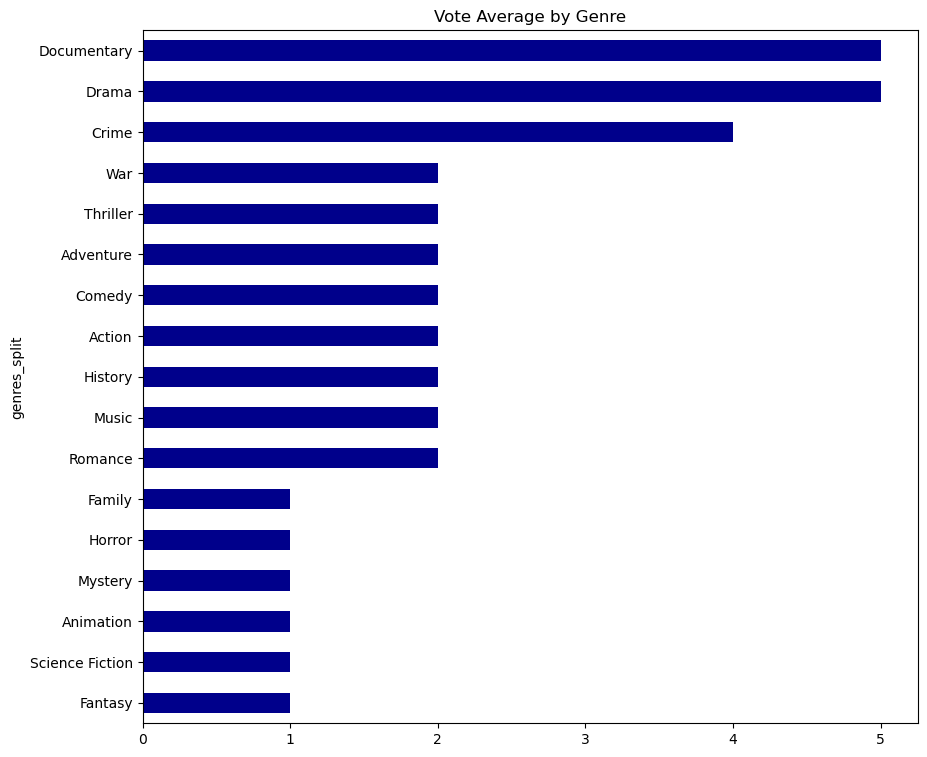

In [80]:
high_rating_genre['vote_average'].plot.barh(title = 'Vote Average by Genre', color = 'DarkBlue', figsize = (10,9))
plt.show()

In [82]:
# Research hypothesis
# The best movies according to vote avg return high profit and revenue

In [84]:
movies_genre2 = movies[['popularity', 'budget', 'revenue', 'profit', 'original_title', 'runtime' , 'genres', 'release_date', 'vote_count', 'vote_average']]
movies_genre2

,popularity,budget,revenue,profit,original_title,runtime,genres,release_date,vote_count,vote_average
0,32.99,150000000,1513528810,1363528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.50
1,28.42,150000000,378436354,228436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.10
2,13.11,110000000,295238201,185238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.30
3,11.17,200000000,2068178225,1868178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.50
4,9.34,190000000,1506249360,1316249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.30
...,...,...,...,...,...,...,...,...,...,...
10861,0.08,0,0,0,The Endless Summer,95,Documentary,6/15/66,11,7.40
10862,0.07,0,0,0,Grand Prix,176,Action|Adventure|Drama,12/21/66,20,5.70
10863,0.07,0,0,0,Beregis Avtomobilya,94,Mystery|Comedy,1/1/66,11,6.50
10864,0.06,0,0,0,"What's Up, Tiger Lily?",80,Action|Comedy,11/2/66,22,5.40


In [86]:
movies_counted = movies_genre2[movies_genre2['vote_count'] >= 50]
movies_counted

,popularity,budget,revenue,profit,original_title,runtime,genres,release_date,vote_count,vote_average
0,32.99,150000000,1513528810,1363528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.50
1,28.42,150000000,378436354,228436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.10
2,13.11,110000000,295238201,185238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.30
3,11.17,200000000,2068178225,1868178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.50
4,9.34,190000000,1506249360,1316249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.30
...,...,...,...,...,...,...,...,...,...,...
10821,0.93,0,0,0,Fahrenheit 451,112,Drama|Science Fiction,9/6/66,93,6.80
10822,0.67,7500000,33736689,26236689,Who's Afraid of Virginia Woolf?,131,Drama,6/21/66,74,7.50
10825,0.51,0,0,0,Blow-Up,111,Drama|Mystery|Thriller,12/18/66,103,6.80
10827,0.41,1377800,0,-1377800,Batman,105,Family|Adventure|Comedy|Science Fiction|Crime,7/30/66,99,5.90


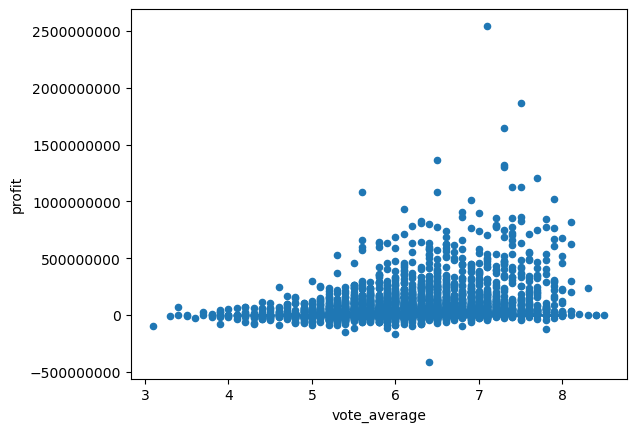

In [88]:
movies_counted.plot.scatter(x ='vote_average', y = 'profit')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

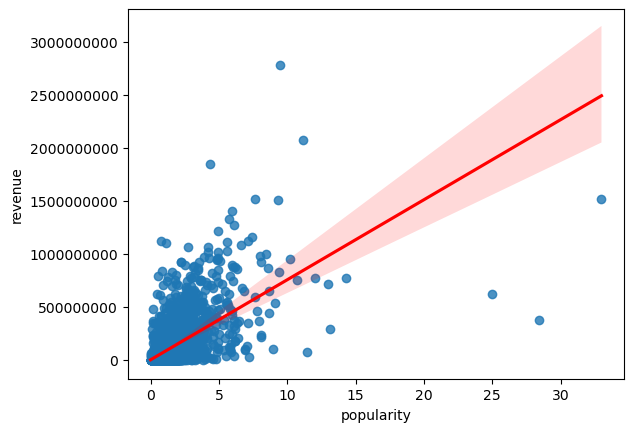

In [90]:
sns.regplot(movies_counted, x ='popularity', y = 'revenue', line_kws = {'color':'red'})
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

In [92]:
pearson_correlation = movies_counted.corr(method = 'spearman', numeric_only = True)
pearson_correlation

,popularity,budget,revenue,profit,runtime,vote_count,vote_average
popularity,1.00,0.48,0.59,0.50,0.23,0.77,0.19
budget,0.48,1.00,0.71,0.33,0.36,0.55,-0.04
revenue,0.59,0.71,1.00,0.84,0.34,0.68,0.11
profit,0.50,0.33,0.84,1.00,0.21,0.58,0.20
runtime,0.23,0.36,0.34,0.21,1.00,0.26,0.29
vote_count,0.77,0.55,0.68,0.58,0.26,1.00,0.29
vote_average,0.19,-0.04,0.11,0.20,0.29,0.29,1.00


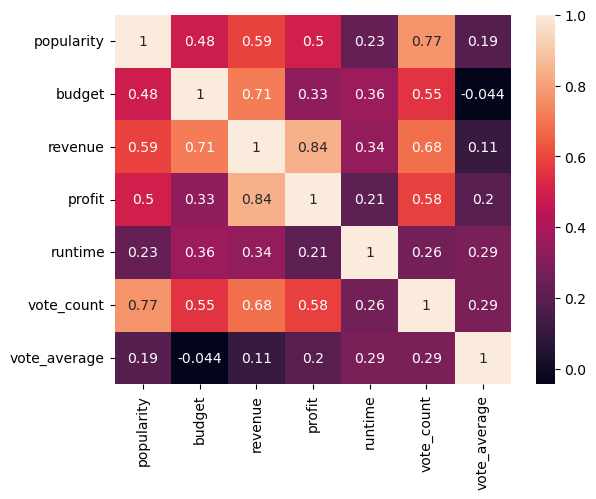

In [96]:
sns.heatmap(pearson_correlation, annot = True )
plt.show()

In [98]:
timed_genre = pd.DataFrame(movies_genre.groupby(['release_year','genres_split'])['profit'].mean())
timed_genre

profit
release_year genres_split               
1960         Action           6363125.00
             Adventure         431000.00
             Comedy           5258750.00
             Crime                  0.00
             Drama            8245619.38
...                                  ...
2015         Science Fiction 83321303.52
             TV Movie         -150000.00
             Thriller        32869106.85
             War             54677314.33
             Western         72856619.00

[1049 rows x 1 columns]

In [100]:
pivot = pd.pivot_table(timed_genre, values = 'profit', columns = 'release_year', index = 'genres_split') 
pivot

release_year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genres_split,,,,,,,,,,,,,,,,,,,,,
Action,6363125.00,2457142.86,10437500.00,14999691.25,24280000.00,16104504.78,324785.71,21732786.43,8868478.83,5861449.30,...,38048623.21,45977444.05,47642764.40,57555510.74,34571030.36,51968078.25,71910257.42,47431725.63,69943650.02,90399046.75
Adventure,431000.00,39130002.33,21214285.71,9428395.00,24123400.00,25124276.33,791563.64,49281873.86,15122159.40,16651809.40,...,64895200.09,83916731.08,55016526.81,113364919.74,98125646.68,113343224.56,162549574.30,100638113.40,120373306.99,144787868.97
Animation,NaN,211880014.00,NaN,0.00,0.00,0.00,-105000.00,100921706.00,0.00,0.00,...,39047734.97,67147670.53,51907242.58,48862898.25,58455658.64,63420098.93,69231546.88,93718795.26,64313463.25,83691174.38
Comedy,5258750.00,22198001.40,1599974.80,765591.92,7080111.38,3264285.71,-149550.00,10135087.47,-1277777.78,-125000.00,...,24944308.17,30674848.55,21483012.43,24741982.81,23154807.88,27241358.72,25631999.14,25068455.09,26648786.86,33703819.07
Crime,0.00,18828411.00,3709948.67,369526.75,1723307.30,-22500.00,-275560.00,12899678.71,6762174.60,31482963.00,...,21551432.96,16700048.40,31258696.85,11016642.31,13490412.32,25395271.62,29522925.56,23248589.51,5903014.23,61286524.37
Documentary,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,...,6772940.00,5229344.63,321262.23,-1603933.56,187417.77,2567196.82,1102306.59,321880.23,13104.14,531061.86
Drama,8245619.38,4912698.38,4373796.19,1587307.69,3726105.55,11933809.80,1014793.06,18045095.00,6354859.15,10317995.54,...,12994800.14,13953425.42,16736384.02,15209056.89,13510589.18,10830976.52,23418944.87,13344942.61,13697098.67,16315310.44
Family,3333333.33,42576002.80,4000000.00,-333333.33,37818181.75,51671428.67,-341828.57,64281204.00,-640000.00,0.00,...,35281751.28,80470561.73,44483026.14,62009322.10,98999767.49,65483435.47,69321493.02,89321956.44,56295182.74,85974520.75
Fantasy,-375000.00,0.00,-126.00,-500000.00,24068181.75,NaN,0.00,-3000000.00,-2000000.00,0.00,...,57967661.44,93461583.43,51441997.77,96235822.10,83235328.52,94486677.85,122245621.97,79363628.00,112966482.64,86576948.30


In [123]:
from matplotlib.ticker import ScalarFormatter

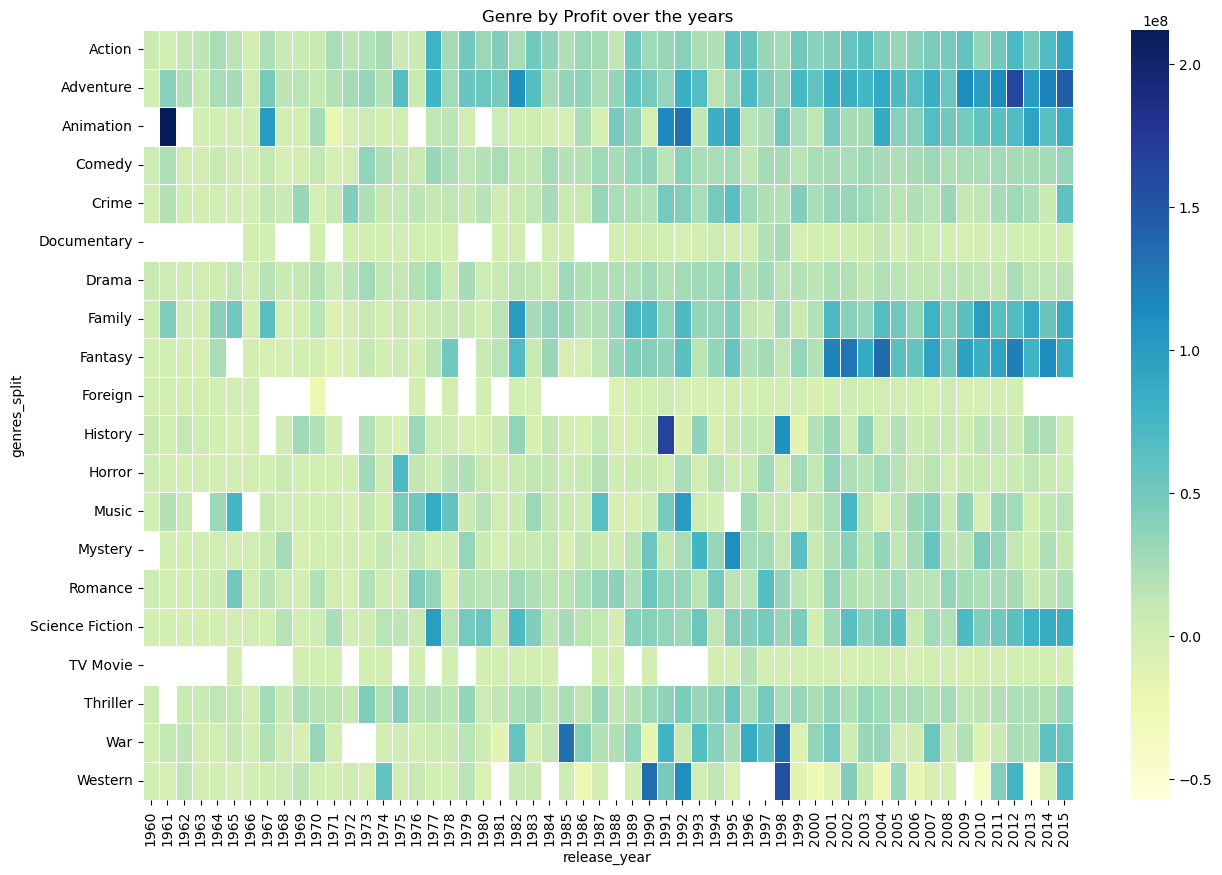

In [127]:
plt.figure(figsize = (15,10))
sns.heatmap(pivot, cmap = 'YlGnBu', linewidths = .5 )
plt.title('Genre by Profit over the years') 
plt.show()